# 🧠 Brain Tumor Classification - Random Test Demo

**Run this notebook to see 5 random predictions from the V5 model.**

Re-run the cells to get different random samples!

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Set working directory
TARGET_DIR = '/home/jovyan/work/cancer modele'
if os.path.exists(TARGET_DIR):
    os.chdir(TARGET_DIR)
    print(f"✅ Working directory: {os.getcwd()}")

# Configuration
MODEL_PATH = 'best_brain_tumor_model_v5_finetuned.keras'
TEST_DIR = 'brain_tumor_dataset/Testing'
IMG_SIZE = (299, 299)
CLASS_NAMES = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load the trained model
print("⏳ Loading model...")
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

2025-12-21 23:41:39.819554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 23:41:39.970795: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-21 23:41:40.008407: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-21 23:41:40.675346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

✅ Working directory: /home/jovyan/work/cancer modele
⏳ Loading model...


2025-12-21 23:41:41.776618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 23:41:42.600593: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 39567 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:4b:00.0, compute capability: 8.6
2025-12-21 23:41:42.601283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46698 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, compute capability: 8.6


✅ Model loaded successfully!


In [2]:
def get_random_test_images(test_dir, n=5):
    """Get n random images from the test directory."""
    all_images = []
    for class_name in CLASS_NAMES:
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    all_images.append((os.path.join(class_path, img_name), class_name))
    return random.sample(all_images, n)

def predict_image(model, img_path):
    """Load image and make prediction."""
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array, verbose=0)
    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) * 100
    
    return img, predicted_class, confidence

print("✅ Functions ready!")

✅ Functions ready!


---
## 🎲 Random Test - Run this cell to get 5 random predictions

**Re-run this cell to see different samples!**

/tmp/ipykernel_46219/1312584735.py:27: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


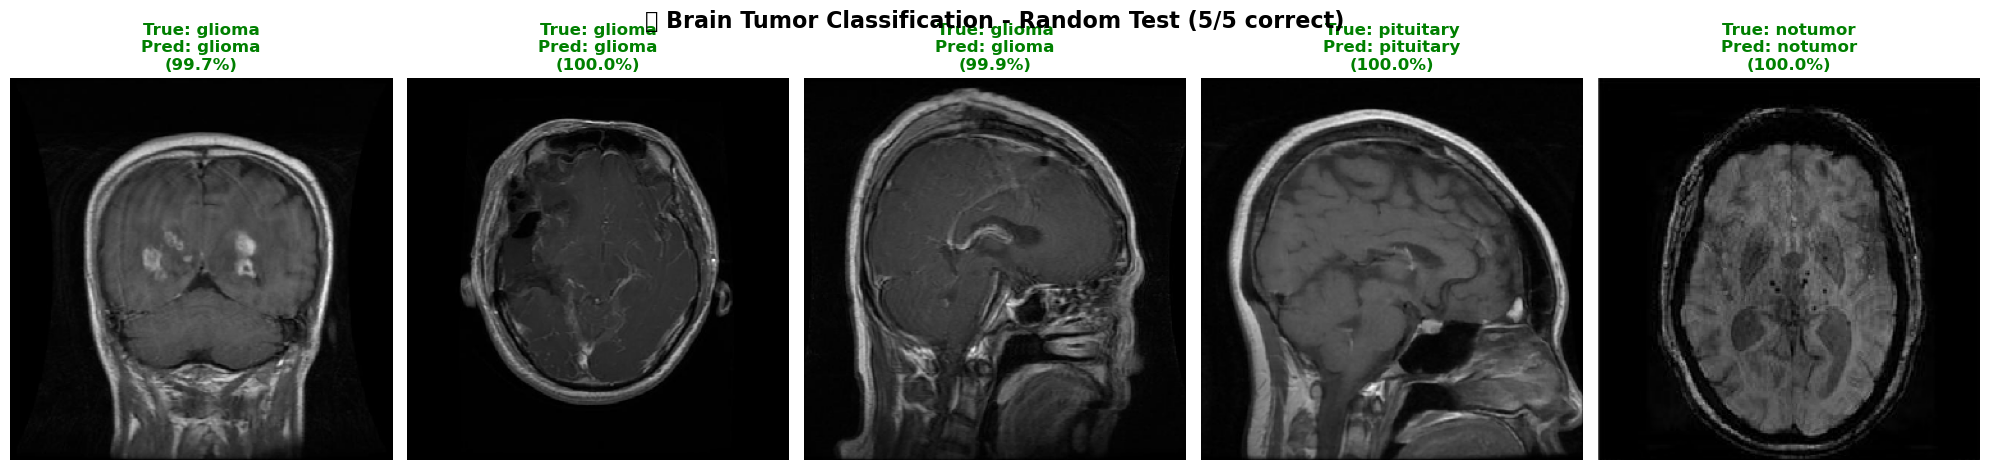


✅ Accuracy on this batch: 5/5 (100%)

🔄 Re-run this cell to test with different random images!


In [11]:
# Get 5 random test images
random_images = get_random_test_images(TEST_DIR, n=5)

# Create figure
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

correct = 0
for i, (img_path, true_label) in enumerate(random_images):
    img, pred_label, confidence = predict_image(model, img_path)
    
    # Check if prediction is correct
    is_correct = pred_label == true_label
    if is_correct:
        correct += 1
    
    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')
    
    # Set title with color based on correctness
    color = 'green' if is_correct else 'red'
    title = f"True: {true_label}\nPred: {pred_label}\n({confidence:.1f}%)"
    axes[i].set_title(title, fontsize=12, fontweight='bold', color=color)

plt.suptitle(f'🧠 Brain Tumor Classification - Random Test ({correct}/5 correct)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✅ Accuracy on this batch: {correct}/5 ({correct/5*100:.0f}%)")
print("\n🔄 Re-run this cell to test with different random images!")